# 12. 다층 인공 신경망을 밑바닥부터 구현
## 12.1 인공 신경망으로 복잡한 함수 모델링
## 12.2 손글씨 숫자 분류

In [1]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """path에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(
                                 len(labels), 784)
        images = ((images / 255.) - .5) * 2
        
    return images, labels

In [2]:
X_train, y_train = load_mnist('/Users/sunghyouk/study_room/mnist', kind='train')
print('행: %d, 열: %d'
      % (X_train.shape[0], X_train.shape[1]))

행: 60000, 열: 784


In [3]:
X_test, y_test = load_mnist('/Users/sunghyouk/study_room/mnist', kind='t10k')
print('행: %d, 열: %d'
      % (X_test.shape[0], X_test.shape[1]))

행: 10000, 열: 784


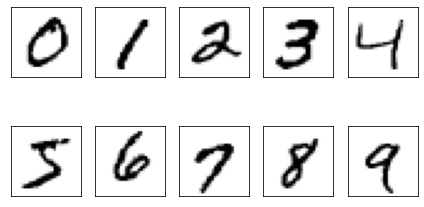

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

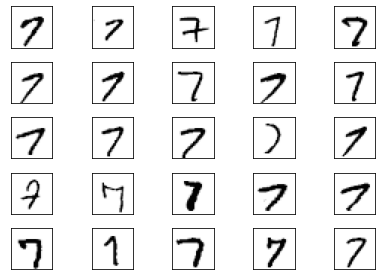

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
from neuralnet import NeuralNetMLP
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=200, eta=0.0005, minibatch_size=100,
                  shuffle=True, seed=1)

In [7]:
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

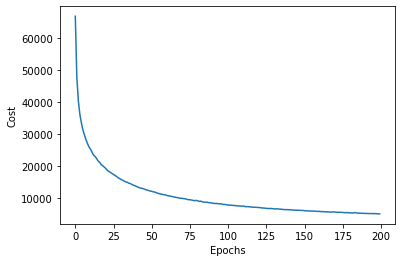

In [8]:
# 에포크가 지남에 따라 비용함수의 값이 감소되는 것 확인
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

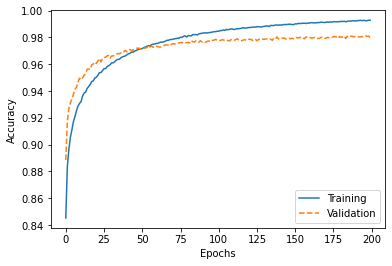

In [9]:
# 훈련 정확도와 검증 정확도
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [11]:
# 테스트 데이터셋에 적용해 보기
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float64) / X_test.shape[0])
print('테스트 정확도: %.2f%%' % (acc * 100))

테스트 정확도: 97.54%


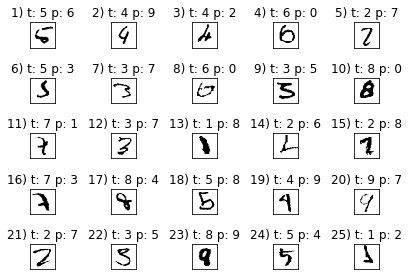

In [12]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d'
                    % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()